In [1]:
# loading packages

import pandas as pd
import datetime


import seaborn as sns # advanced vizs


# stats
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
   

# import modules
import manageData as md
import eda as ed
import reg as rf
import Classification as cl
import warnings

In [2]:
def main():
    
    warnings.filterwarnings('ignore')
    warnings.warn('DelftStack')
    warnings.warn('Do not show this message')
    dataClass= md.loadDf()
    reg = rf.rfr()
    cla=cl.classificationModel()
    eda = ed.edaClass()
    
    try:
        student = dataClass.createDf()
        if(student):
            std = dataClass.dataPro(student[0])
            stdGraph = std.copy()
            classes = dataClass.dataPro(student[0]).select_dtypes(include='object')
            dataClass.ifmissing(std)
            intStudent = std.select_dtypes(include='int64')
#             display(statDetails(intStudent))
            seed = 500
            encodedata = reg.encodedata(std).drop('finalScore',axis=1)
            target = std.finalScore
            X_train, X_test, y_train, y_test = train_test_split(encodedata, target, test_size = 0.2, random_state = seed)
            max_depth= 7
            max_features= 0.3
            print("Train", X_train.shape, "and test", X_test.shape)
            
            print("#############################################################################################")
            print("###################################Random Forest Regression##################################")
            print("#############################################################################################")
            
            rfr = reg.rfregressor(max_depth,max_features,X_train, y_train, X_test, y_test)
            reg.MSE(y_test, rfr[1])
            reg.R2(y_test, rfr[1])
#             display(rfr[0])
            bestpara = reg.gridSearchrf(X_train, y_train)
    
            print("\nAfter applying parameters obtained from gridsearch")
            print("**************************************************")

            rfrgrid = reg.rfregressor(bestpara["max_depth"],bestpara["max_features"],X_train, y_train, X_test, y_test)
            reg.MSE(y_test, rfrgrid[1])
            reg.R2(y_test, rfrgrid[1])
            display(rfrgrid[0])
            
            print("\nAfter converting categorical data into dummy variables.")
            print("*******************************************************")
            feature= reg.createFeature(std)
            newsampleData = reg.dummydata(classes,feature).drop('finalScore',axis=1)# Feature Encoding
#             display(newsampleData)
            XX_train, XX_test, yy_train, yy_test = train_test_split(newsampleData, target, test_size = 0.2, random_state = seed)
            newrfr = reg.rfregressor(max_depth,max_features,XX_train, yy_train,  XX_test, yy_test)
            reg.MSE(y_test, newrfr[1])
            reg.R2(y_test, newrfr[1])
            display(newrfr[0])
            
            #feature importance graph
            model_rf = rfr[2]
            features = encodedata.columns
            reg.featureImportanceGraph(model_rf,features)
            
            print("#############################################################################################")
            print("########################################Classification#######################################")
            print("#############################################################################################")
            
            #Random forest classification
            max_depth= 7
            max_features= 0.3
            encodedata = reg.encodedata(std).drop('finalGrade',axis=1)
            target = reg.encodedata(std).finalGrade
#             display(encodedata)
#             display(target)
            X_train, X_test, y_train, y_test = train_test_split(encodedata, target, test_size = 0.2, random_state = seed)
    
            print("\nRandom Forest classifier model.")
            print("*******************************************************")
            rfcModelVal = cla.rfc(max_features,max_depth,X_train, y_train,X_test, y_test)
            reg.MSE(y_test, rfcModelVal[1])
            reg.R2(y_test, rfcModelVal[1])
            display(rfcModelVal[0])            
           
            cla.smoterfc(max_features,max_depth,X_train, y_train,X_test, y_test)
            
            print("\nSVM model.")
            print("*******************************************************")
            cla.svm(X_train, y_train,X_test, y_test)
            cla.smotesvm(X_train, y_train,X_test, y_test)
            
            print("\nMPL model.")
            print("*******************************************************")
            cla.mpl(X_train, y_train,X_test, y_test)
            cla.adsnmpl(X_train, y_train,X_test, y_test)
            
            print("#############################################################################################")
            print("########################################      EDA     #######################################")
            print("#############################################################################################")
            display(eda.statDetails(intStudent))
            eda.corrMatrix(stdGraph)
            eda.barGraphStudentPerformance(stdGraph)
            eda.piechart(stdGraph)
#             eda.visualisation(std)

    except AttributeError:
        print("module attribute reference or assignment fails")
    except TypeError:
        print("operation or function is applied to an object of inappropriate datatype.")
    except ValueError:
        print("a built-in operation or function receives an argument that has right datatype but wrong value.")
    


Total number of missing= 0
Train (835, 34) and test (209, 34)
#############################################################################################
###################################Random Forest Regression##################################
#############################################################################################
Score with the train set = 88.31
MSE: 1.541
R2: 0.883
Best combination: {'max_depth': 8, 'max_features': 0.2}

After applying parameters obtained from gridsearch
**************************************************
Score with the train set = 85.54
MSE: 1.862
R2: 0.859


,true,predicted
0,13,12.727096
1,18,16.664906
2,13,12.099195
3,12,12.698424
4,10,10.392037



After converting categorical data into dummy variables.
*******************************************************
Score with the train set = 89.29
MSE: 1.585
R2: 0.880


,true,predicted
0,13,12.697820
1,18,17.111538
2,13,12.445978
3,12,12.739335
4,10,10.498733


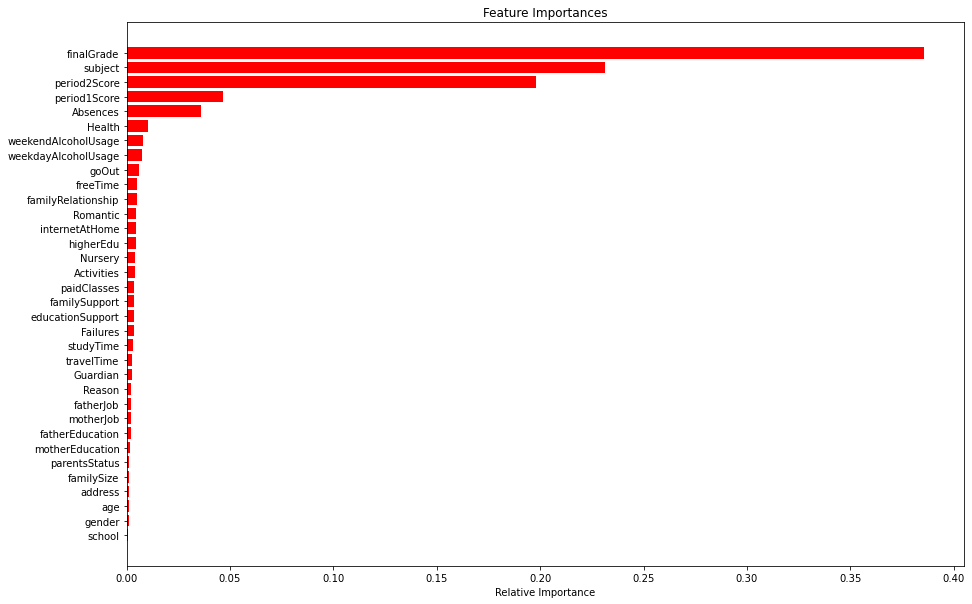

#############################################################################################
########################################Classification#######################################
#############################################################################################

Random Forest classifier model.
*******************************************************
Score with the train set = 100.00
Confusion Matrix of Random Forest Classifier Model:
[[ 34   0   0]
 [  0  46   0]
 [  0   0 129]]
Accuracy Score of Random Forest Classifier Model before sampling: 1.0
Report of Random Forest Classifier Model: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00       129

    accuracy                           1.00       209
   macro avg       1.00      1.00      1.00       209
weighted avg       1.00      1.00      1.00       209

MSE

,true,predicted
0,2,2
1,0,0
2,2,2
3,2,2
4,2,2


Smote Sampling Technique
Accuracy of Random Forest Classifier Model after sampling 100.0 %

SVM model.
*******************************************************
Classification Report of SVM 

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        34
           1       0.98      0.87      0.92        46
           2       0.95      0.98      0.97       129

    accuracy                           0.96       209
   macro avg       0.96      0.94      0.95       209
weighted avg       0.96      0.96      0.96       209

Accuracy of SVM model : 94.13 %
With sampling
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        34
           1       0.86      0.91      0.88        46
           2       0.96      0.93      0.94       129

    accuracy                           0.93       209
   macro avg       0.92      0.94      0.93       209
weighted avg       0.93      0.93      0.93       209

Ac

,age,motherEducation,fatherEducation,travelTime,studyTime,Failures,familyRelationship,freeTime,goOut,weekdayAlcoholUsage,weekendAlcoholUsage,Health,Absences,period1Score,period2Score,finalScore
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.00000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.730000,2.600000,2.390000,1.520000,1.970000,0.26000,3.940000,3.200000,3.160000,1.490000,2.280000,3.540000,4.430000,11.210000,11.250000,11.340000
median,17.000000,3.000000,2.000000,1.000000,2.000000,0.00000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
variance,1.540000,1.270000,1.210000,0.540000,0.700000,0.43000,0.870000,1.060000,1.330000,0.830000,1.650000,2.030000,38.560000,8.900000,10.790000,14.940000
std,1.240000,1.120000,1.100000,0.730000,0.830000,0.66000,0.930000,1.030000,1.150000,0.910000,1.290000,1.420000,6.210000,2.980000,3.290000,3.860000
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.00000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.00000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.00000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
Max,22.000000,4.000000,4.000000,4.000000,4.000000,3.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


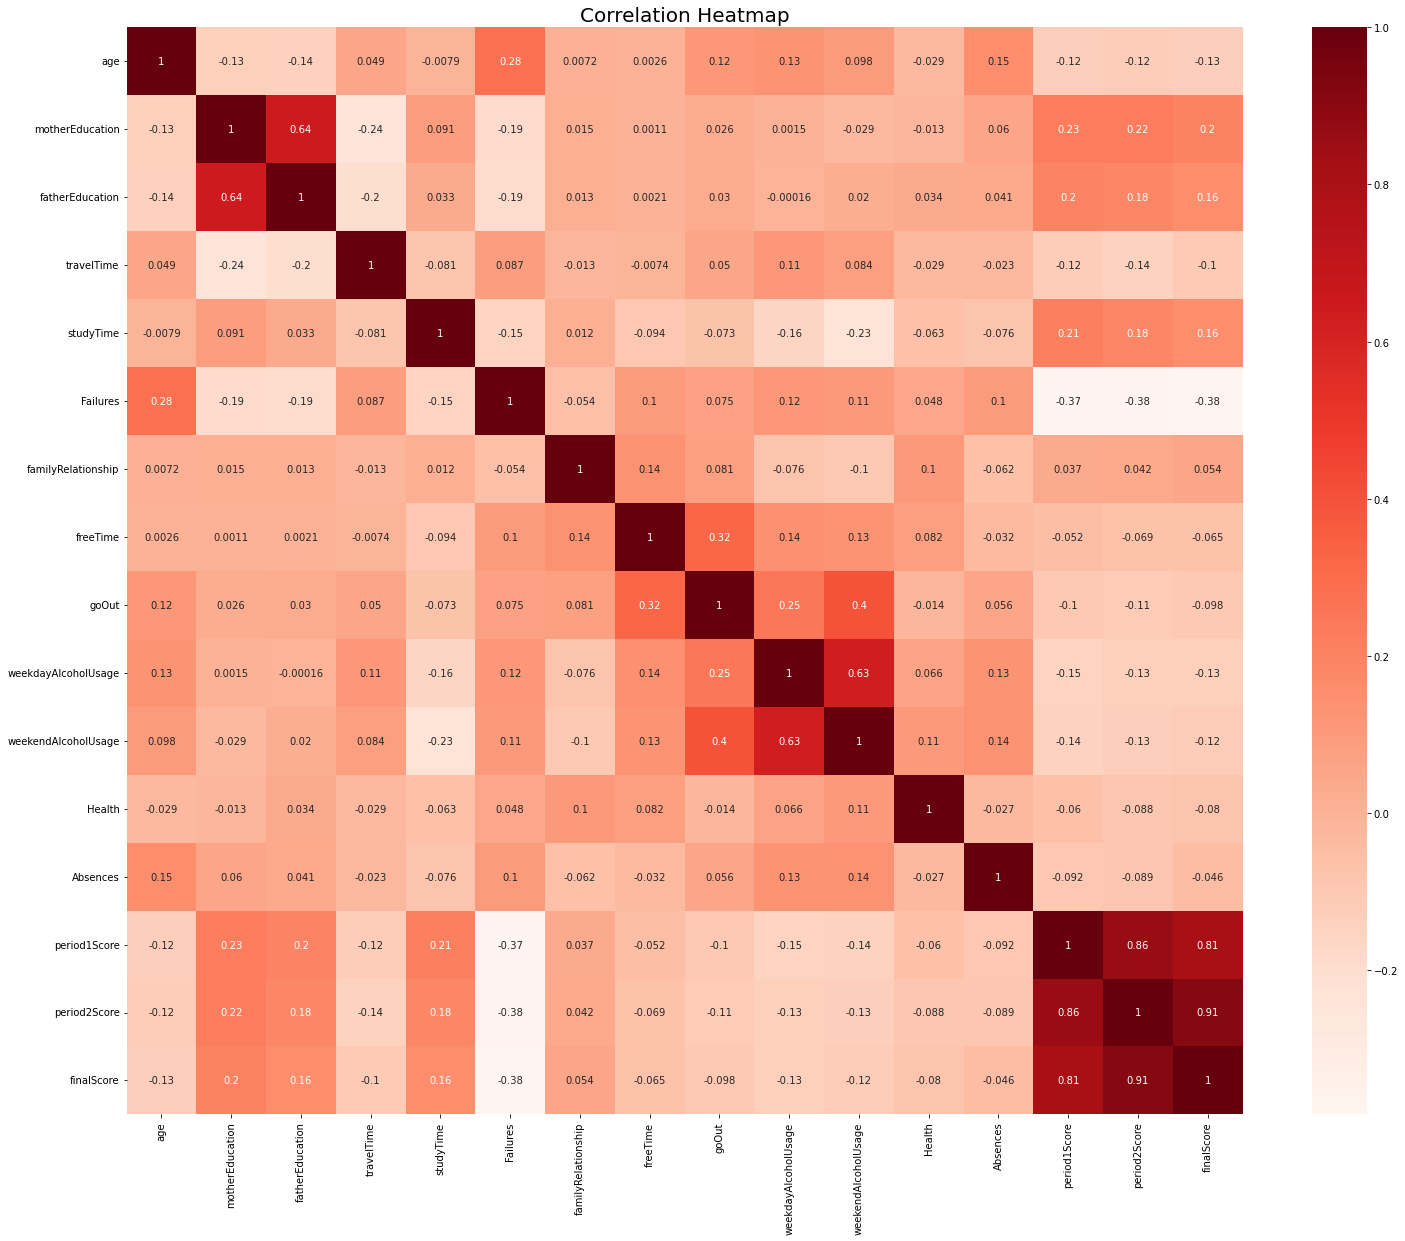

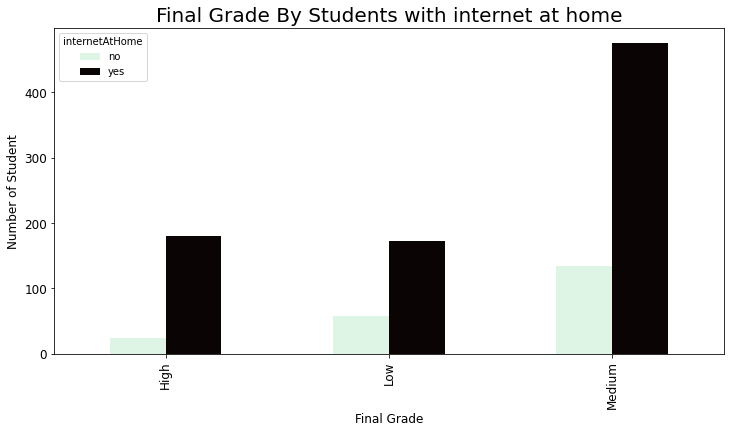

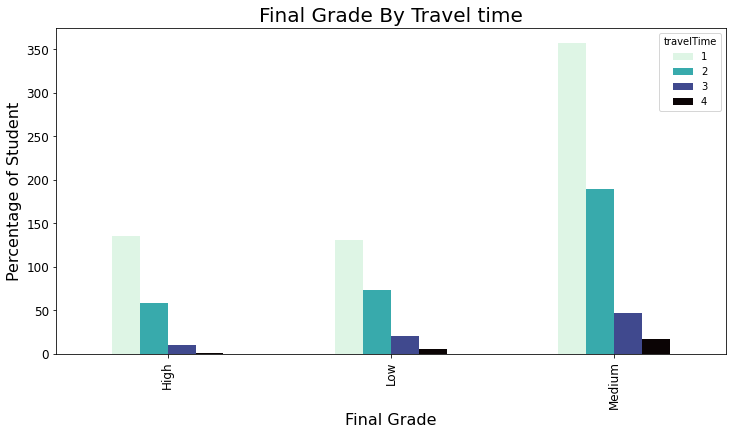

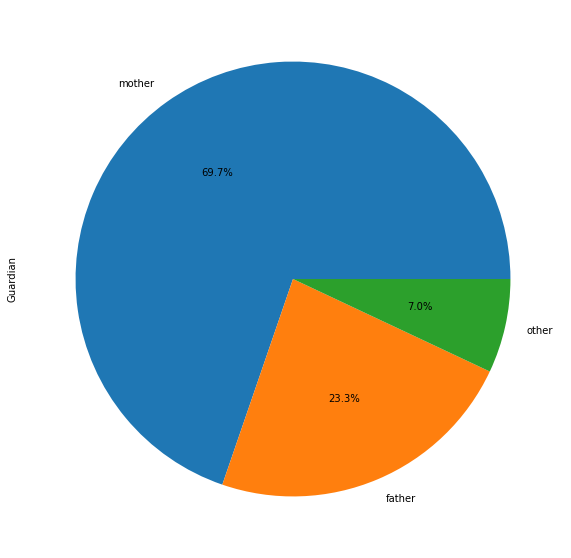

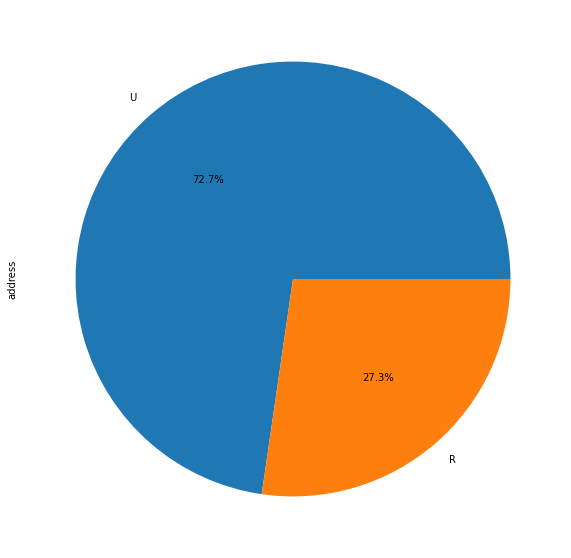

In [3]:
main()
